In [1]:
import jax
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import Hop, MCMC

In [2]:
def normal(D=2, mu=0, sigma=1):
    with numpyro.plate('D', D):
        theta = numpyro.sample('theta', dist.Normal(mu, sigma))

In [3]:
lam = 2
kernel = Hop(normal, lam=lam, mu=np.sqrt(0.5 * lam))
mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)

rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, D=2, mu=1, sigma=1, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:00<00:00, 1176.62it/s]


In [4]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([[ 0.7560978 ,  1.8552608 ],
              [-0.22478884,  2.624851  ],
              [-0.22478884,  2.624851  ],
              ...,
              [ 1.4396101 ,  0.7608808 ],
              [ 1.3506513 , -0.5475774 ],
              [ 1.3506513 , -0.5475774 ]], dtype=float32)}

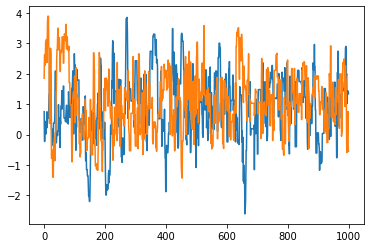

In [5]:
plt.plot(samples["theta"])

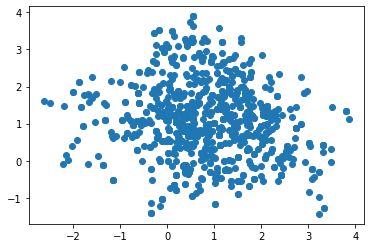

In [6]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

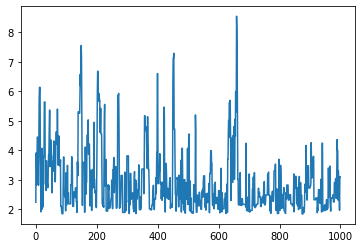

In [7]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(array([277.,  64.,  27.,  28.,  31.,  29.,  36.,  46.,  55., 407.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

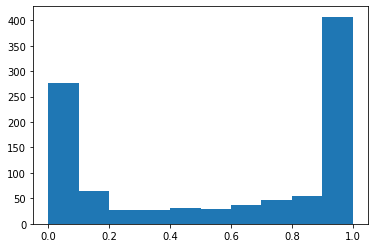

In [8]:
plt.hist(ap)